In [1]:
# load important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score

In [2]:
# Read the data from the csv file into a dataframe
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape

(4269, 13)

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Edit column names to remove the spaces before the column names

df.columns = df.columns.str.lower().str.replace(' ','')

In [6]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
# Check for missing values

df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
# check the data types in the data frame
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [9]:
# loan_id is redundant and can be deleted
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [10]:
# loan_id is a redudntant column so we can delete it

del df['loan_id']


In [11]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [12]:
# Get the names of the numerical features and the categorical features

categorical = list(df.dtypes[df.dtypes=='object'].index)
categorical

['education', 'self_employed', 'loan_status']

In [13]:
numerical = list(df.dtypes[df.dtypes!='object'].index)
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [14]:
# Examine the values of the categorical

for value in categorical:
    print(df[value].value_counts().index)

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')
Index([' Yes', ' No'], dtype='object', name='self_employed')
Index([' Approved', ' Rejected'], dtype='object', name='loan_status')


In [15]:
# First remove the spaces in 'Not Graduate'
df['education'] = df['education'].str.replace(' Not ', ' Not_')
df['education'].head()

0         Graduate
1     Not_Graduate
2         Graduate
3         Graduate
4     Not_Graduate
Name: education, dtype: object

In [16]:
# Continue editing the values of the categorical to remove the remaining extra spaces
for value in categorical:
    df[value] = df[value].str.lower().str.replace(' ','')

for value in categorical:
    print(df[value].value_counts().index)

Index(['graduate', 'not_graduate'], dtype='object', name='education')
Index(['yes', 'no'], dtype='object', name='self_employed')
Index(['approved', 'rejected'], dtype='object', name='loan_status')


In [17]:
# Examine the unique values of the categoricals

df[categorical].nunique()

education        2
self_employed    2
loan_status      2
dtype: int64

In [18]:
# We can examine the numerical columns (i.e. features)

df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
# Convert the target variable to numerical

df['loan_status'] = (df['loan_status'] == 'approved').astype(int)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,not_graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,not_graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [20]:
# Update the new categorical variables to exclude the target variable
categorical = categorical[:-1]
categorical

['education', 'self_employed']

<Axes: xlabel='loan_amount', ylabel='Count'>

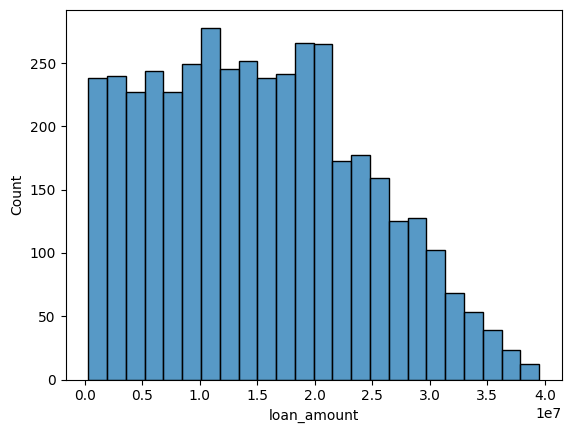

In [21]:
# Plot the histogram of the features to see their distribution
sns.histplot(df.loan_amount)

In [22]:
# Try to normalize the distribution if not normalized

In [23]:
# Split the data into train, validation and test sets (60%, 20%, 20%)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle=False)

In [25]:
len(df_train) + len(df_val) + len(df_test) == len(df)

True

In [26]:
# Retreive the values of the target variable
y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

In [27]:
len(y_train) + len(y_val) + len(y_test) == len(df)

True

In [28]:
# Delete the target variable from the dataframes
del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

In [31]:
# Compute feature importance (mutual information for categorical features)
def mutual_info_loan_status_score(series):
    return mutual_info_score(series, df_full_train.loan_status)

mi = df_full_train[categorical].apply(mutual_info_loan_status_score)

mi.sort_values(ascending=False)

mi


education        0.000060
self_employed    0.000009
dtype: float64

In [39]:
# Compute feature importance (correlation information for numerical features)
# Correlation matrix for the numerial variables

corr_matrix = np.zeros([len(numerical),len(numerical)])
i = 0
for col in numerical:
    corr_matrix[i,:] = df_full_train[numerical].corrwith(df_full_train[col]).abs()
    i = i+1
corr_matrix.round(3)

array([[1.   , 0.011, 0.003, 0.004, 0.009, 0.012, 0.005, 0.009, 0.02 ],
       [0.011, 1.   , 0.929, 0.003, 0.013, 0.63 , 0.64 , 0.928, 0.853],
       [0.003, 0.929, 1.   , 0.   , 0.008, 0.594, 0.598, 0.862, 0.791],
       [0.004, 0.003, 0.   , 1.   , 0.006, 0.003, 0.005, 0.001, 0.005],
       [0.009, 0.013, 0.008, 0.006, 1.   , 0.019, 0.008, 0.021, 0.012],
       [0.012, 0.63 , 0.594, 0.003, 0.019, 1.   , 0.421, 0.582, 0.527],
       [0.005, 0.64 , 0.598, 0.005, 0.008, 0.421, 1.   , 0.588, 0.553],
       [0.009, 0.928, 0.862, 0.001, 0.021, 0.582, 0.588, 1.   , 0.791],
       [0.02 , 0.853, 0.791, 0.005, 0.012, 0.527, 0.553, 0.791, 1.   ]])

In [40]:
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [52]:
# Compute the correlation matrix to see the dependence of the numberical features on the target variable
df_full_train[numerical].corrwith(df_full_train['loan_status']).abs().sort_values(ascending=False)

cibil_score                 0.771858
loan_term                   0.113112
loan_amount                 0.020522
residential_assets_value    0.019803
no_of_dependents            0.016512
commercial_assets_value     0.013950
luxury_assets_value         0.013616
income_annum                0.009410
bank_asset_value            0.001711
dtype: float64